In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv',index_col='date' , parse_dates=True)

# Clean data
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


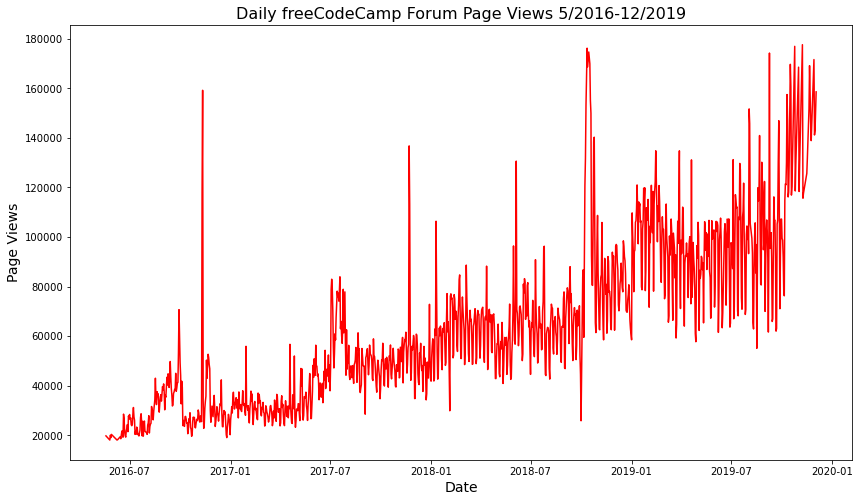

In [5]:

    # Draw line plot
fig , ax = plt.subplots(figsize=(14,8),)

ax.plot(df['value'],color='red')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019',fontsize=16)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Page Views',fontsize=14)

  # Save image and return fig (don't change this part)
fig.savefig('line_plot.png')


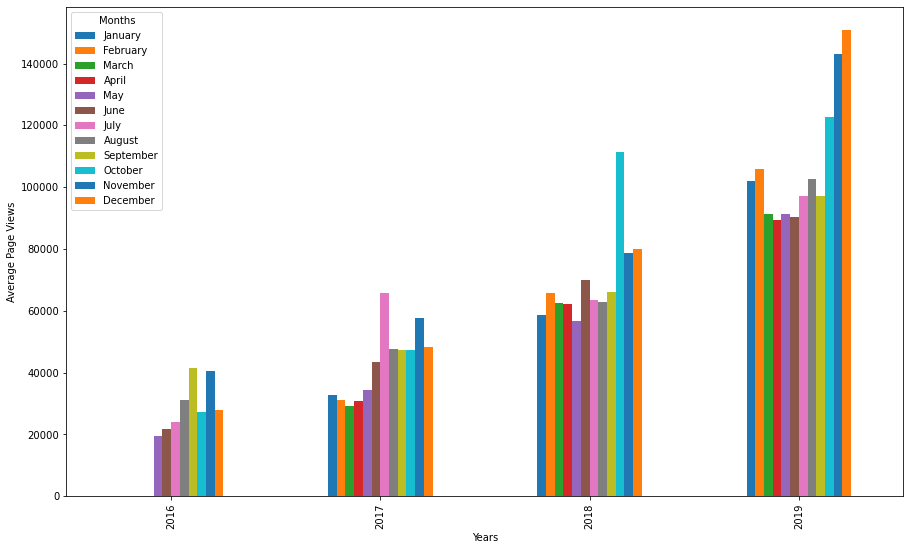

In [6]:

    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['month'] = df.index.month
    df_bar['year'] = df.index.year
    df_bar2 = pd.melt(df_bar,id_vars=['month','year'],value_vars=['value'],value_name='page views')
    df_bar2.drop('variable',axis='columns',inplace=True)
    df_bar3 = df_bar2.groupby(['year', 'month'],as_index=False)['page views'].mean()
    df_bar3['month']=pd.to_datetime(df_bar3['month'],format='%m') 
    df_bar3['month'] = df_bar3['month'].dt.strftime('%B')

    df4 = df_bar3.pivot(index='year', columns='month', values='page views')
    df4 = df4.reindex(['January','February','March', 'April','May','June','July','August','September','October','November','December'], axis=1)
    df4.fillna(0,inplace=True)

    fig,axs= plt.subplots(figsize=(15,9))
    df4.plot(ax=axs,kind='bar')
    axs.set_ylabel("Average Page Views")
    axs.set_xlabel('Years')
    plt.legend(title='Months')
  
    # Draw bar plot
    fig.savefig('bar_plot.png')


In [10]:
df_bar


,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


In [16]:
df_bar2 = pd.melt(df_bar,id_vars=['month','year'],value_vars=['value'],value_name='page views')
df_bar2.drop('variable',axis='columns',inplace=True)
df_bar2

,month,year,page views
0,5,2016,19736
1,5,2016,18060
2,5,2016,19997
3,5,2016,19044
4,5,2016,20325
...,...,...,...
1233,11,2019,138875
1234,11,2019,171584
1235,11,2019,141161
1236,12,2019,142918


In [17]:
df_bar3 = df_bar2.groupby(['year', 'month'],as_index=False)['page views'].mean()
df_bar3.head()

,year,month,page views
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667


In [19]:
#df_bar3['month']=pd.to_datetime(df_bar3['month'],format='%m') 

df_bar3['month'] = df_bar3['month'].dt.strftime('%B')
df_bar3.head()

,year,month,page views
0,2016,May,19432.400000
1,2016,June,21875.105263
2,2016,July,24109.678571
3,2016,August,31049.193548
4,2016,September,41476.866667


In [20]:
df4 = df_bar3.pivot(index='year', columns='month', values='page views')
df4

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2016,NaN,31049.193548,27832.419355,NaN,NaN,24109.678571,21875.105263,NaN,19432.400000,40448.633333,27398.322581,41476.866667
2017,30878.733333,47712.451613,48420.580645,31113.071429,32785.161290,65806.838710,43577.500000,29369.096774,34244.290323,57701.566667,47438.709677,47376.800000
2018,62350.833333,62831.612903,80047.483871,65679.000000,58580.096774,63591.064516,70117.000000,62693.774194,56562.870968,78688.333333,111378.142857,65941.733333
2019,89368.433333,102717.310345,150733.500000,105968.357143,102056.516129,97236.566667,90435.642857,91214.483871,91439.903226,143166.428571,122802.272727,97268.833333


In [22]:
df4 = df4.reindex(['January','February','March', 'April','May','June','July','August','September','October','November','December'], axis=1)
df4.fillna(0,inplace=True)
df4

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,0.000000,0.000000,0.000000,0.000000,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


<AxesSubplot:xlabel='year'>

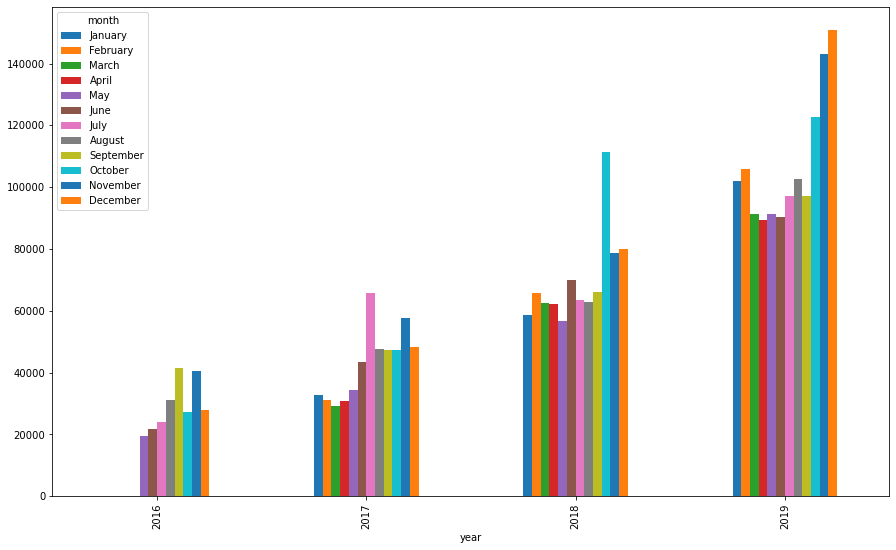

In [27]:

fig,axs= plt.subplots(figsize=(15,9))
df4.plot(ax=axs,kind='bar')

In [ ]:

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    #Draw box plots (using Seaborn)
    df_box['month'] = pd.to_datetime(df_box['month'], format='%b')
    df_box = df_box.sort_values(by='month')
    df_box['month'] = [d.strftime('%b') for d in df_box.date]


    fig, axs = plt.subplots(1,2,figsize=(40,15))

    sns.boxplot(ax=axs[0], x=df_box['year'],y=df_box['value'])
    axs[0].set_title('Year-wise Box Plot (Trend)')
    axs[0].set_ylabel('page veiws')
    

    sns.boxplot(ax=axs[1], x=df_box['month'], y=df_box['value'] )
    axs[1].set_title('Month-wise Box Plot (Seasonality)')
    axs[1].set_ylabel('page veiws')
    axs[1].set_xlabel('Year')



    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


In [35]:
 # Prepare data for box plots (this part is done!)
df_box = df.copy()    
df_box.reset_index(inplace=True)    
df_box['year'] = [d.year for d in df_box.date]    
df_box['month'] = [d.strftime('%b') for d in df_box.date]  
df_box['month'] = pd.to_datetime(df_box['month'], format='%b')
df_box = df_box.sort_values(by='month')
df_box['month'] = [d.strftime('%b') for d in df_box.date]  
df_box.head()

,date,value,year,month
210,2017-01-06,37353,2017,Jan
937,2019-01-06,94108,2019,Jan
936,2019-01-05,77897,2019,Jan
935,2019-01-04,94514,2019,Jan
934,2019-01-03,100710,2019,Jan


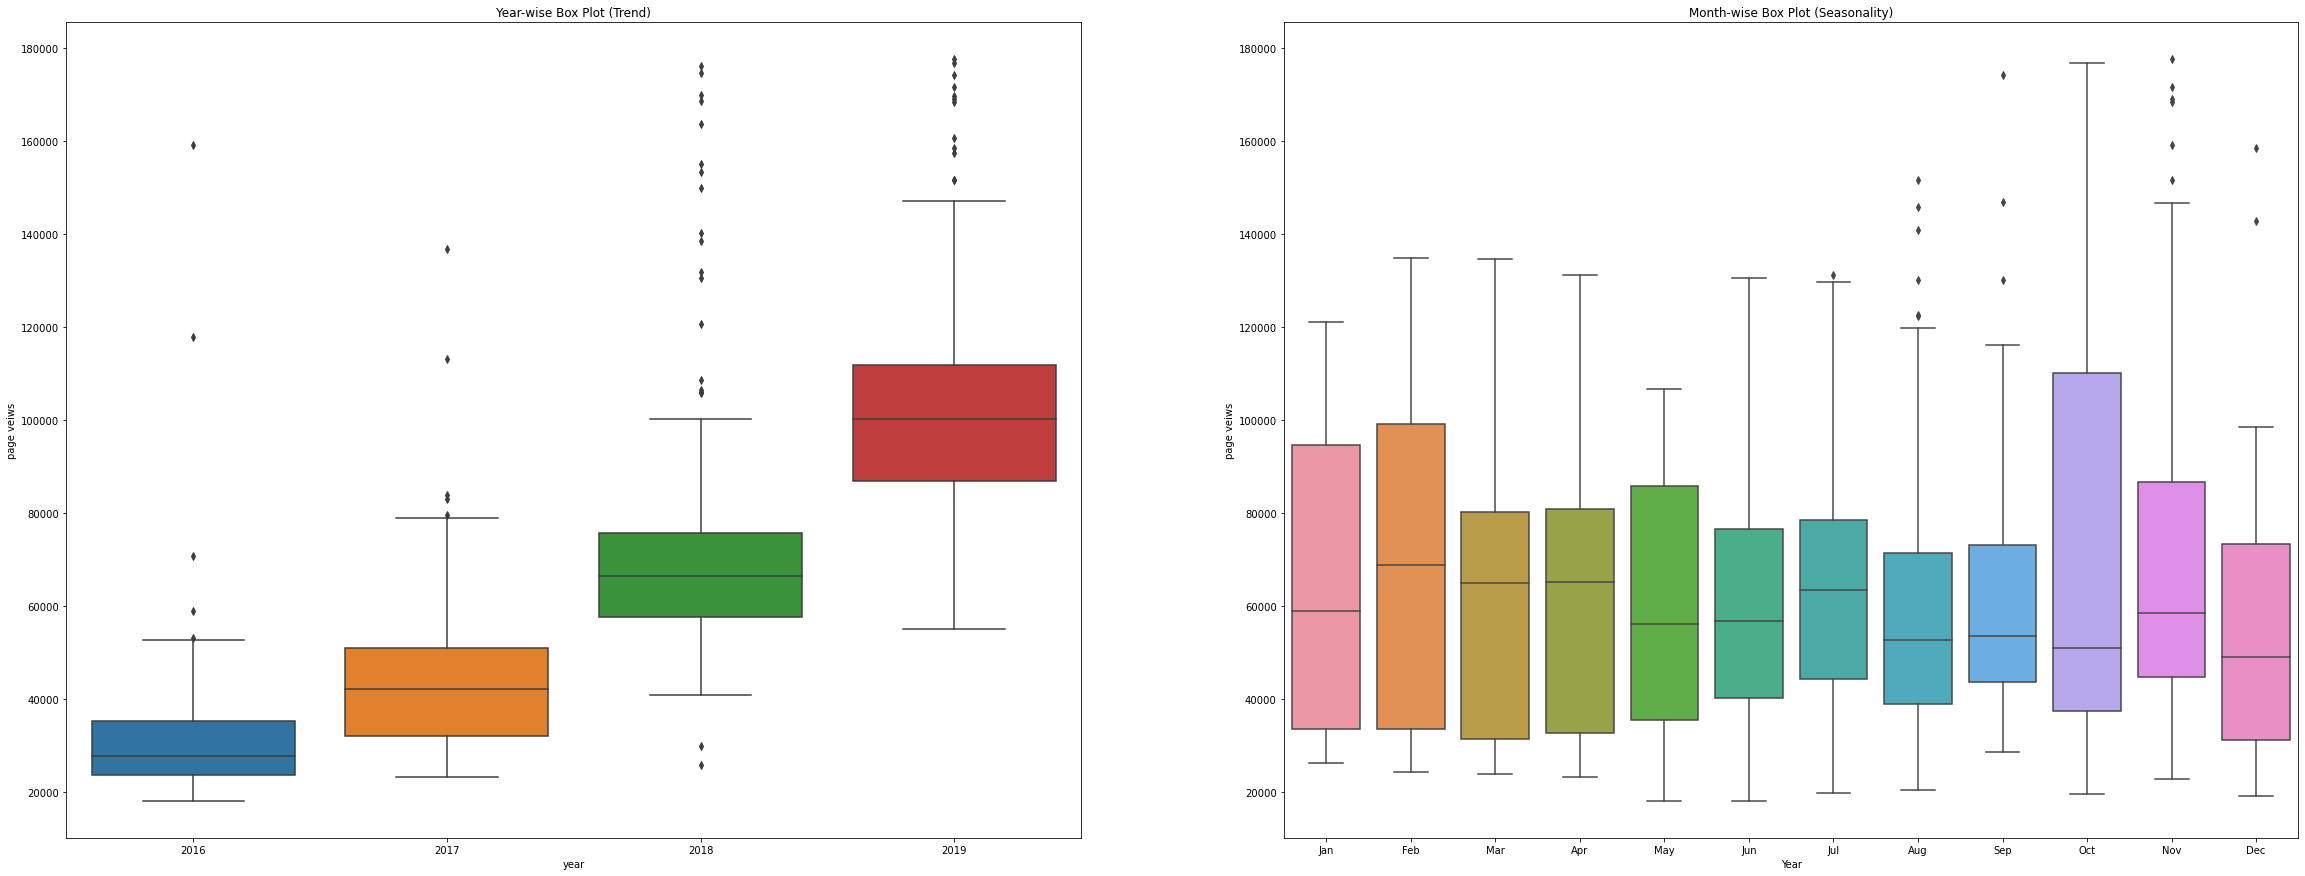

In [41]:
    fig, axs = plt.subplots(1,2,figsize=(40,15))

    sns.boxplot(ax=axs[0], x=df_box['year'],y=df_box['value'])
    axs[0].set_title('Year-wise Box Plot (Trend)')
    axs[0].set_ylabel('page veiws')
    

    sns.boxplot(ax=axs[1], x=df_box['month'], y=df_box['value'] )
    axs[1].set_title('Month-wise Box Plot (Seasonality)')
    axs[1].set_ylabel('page veiws')
    axs[1].set_xlabel('Year');